<a href="https://colab.research.google.com/github/bhavi289/DL-GANs/blob/master/DL_Assign2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf

    100% |████████████████████████████████| 332.1MB 56kB/s 
    100% |████████████████████████████████| 3.0MB 8.2MB/s 
    100% |████████████████████████████████| 419kB 11.5MB/s 
    100% |████████████████████████████████| 61kB 20.2MB/s 


In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf

In [8]:
tf.__version__

'2.0.0-alpha0'

In [9]:
# Load the Drive helper and mount
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import os
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as layers # Keras layers API
import tensorflow.keras.models as models # Keras layers API
import tensorflow.keras.optimizers as Adam # Keras layers API


from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset_path = 'drive/My Drive/DL Assign2 GAN Dataset/faces94/'

In [11]:
import PIL
flag = 0
# X, y = '', ''
X = []
i = 0
for root, directories, files in os.walk(dataset_path):
#   print (f"{root}\n\n, Here{_}\n\n, {files}\n")
  
  for file in files:
    try:
        file_path = root + '/' + file
#         print (file_path)
        extension_list = ['jpg', 'jpeg', 'png', 'svg']
        i += 1
        print (i)
        if (file_path.split('.')[-1] in extension_list):
#           X.append(file_path)
        # class is dependent variable. Taken from folder name where images are kept
        # ground_truth = int(file_path.strip().split('/')[-2]) -1
          
          img = PIL.Image.open( file_path )
          img = img.resize((128, 128))
          img.load()
          image = np.asarray( img, dtype="int32" )
          
#           print (file_path)
#           im = matplotlib.pyplot.imread(file_path)
#           image = np.array(im)
          if flag == 0:
            flag = 1
            X = np.array([image])
          else:
            X = np.append(X, [image], axis=0)
    except Exception as e:
        print (e)   
        pass

# data, labels = np.arange(10).reshape((5, 2)), range(5)
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=42)

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print ("success")
print (len(X))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
# Helper function to load image
import PIL
def load_image( infilename ) :
    img = PIL.Image.open( infilename )
#     print ((img))
#     print (np.array(img).shape)
#     img = img.resize((64,64))
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

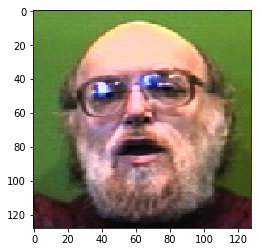

In [13]:

plt.imshow((X[3000]), interpolation='nearest')
plt.show()

In [14]:
 X.shape

(3059, 128, 128, 3)

In [0]:
from sklearn import preprocessing
X_train = X/255
# print (X_train)

In [16]:
X_train.shape

(3059, 128, 128, 3)

In [0]:
input_img = layers.Input(shape=(128, 128, 3))

x = layers.Conv2D(8, (5, 5), strides=2, padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(64, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(100, (4, 4), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
encoded = layers.Activation('relu')(x)

# encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2DTranspose(64, (4, 4), padding='same')(encoded)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(32, (6, 6), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(16, (6, 6), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(8, (7, 7), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(8, (7, 7), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(3, (8, 8), strides=2,padding='same')(x)
decoded = layers.BatchNormalization()(x)
# decoded = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(64, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(3, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# decoded = layers.Activation('sigmoid')(x)

In [0]:
model = models.Model(input_img, decoded)
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
X.shape

(3059, 128, 128, 3)

In [20]:
X_train.shape

(3059, 128, 128, 3)

In [21]:
model.fit(X_train, X_train,
          epochs=50,
          batch_size=32,
          shuffle=True,
          )

Epoch 1/50
3059/3059 [==============================] - 10s 3ms/sample - loss: 0.7448
Epoch 2/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.5049
Epoch 3/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.3674
Epoch 4/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.2670
Epoch 5/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.1278
Epoch 6/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.0161
Epoch 7/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.0113
Epoch 8/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.0099
Epoch 9/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.0093
Epoch 10/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.0088
Epoch 11/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.0083
Epoch 12/50
3059/3059 [==============================] - 6s 2m

In [0]:
 encoder = models.Model(input_img, encoded)

In [0]:
# decoded_imgs = model.predict(X_train)

# # decoded_imgs[0]

# n = 10
# plt.figure(figsize=(20, 4))
# for i in range(1,n):
#     # display original
#     ax = plt.subplot(2, n, i)
#     plt.imshow(X_train[i].reshape(128, 128, 3))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # display reconstruction
#     ax = plt.subplot(2, n, i + n)
#     plt.imshow((decoded_imgs[i]))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

W0415 15:35:48.520335 140246006585216 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0415 15:35:48.566990 140246006585216 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0415 15:35:48.604792 140246006585216 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0415 15:35:48.643993 140246006585216 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0415 15:35:48.678447 140246006585216 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0415 15:35:48.714062 140246006585216 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0415 15:35:48.749803 140246

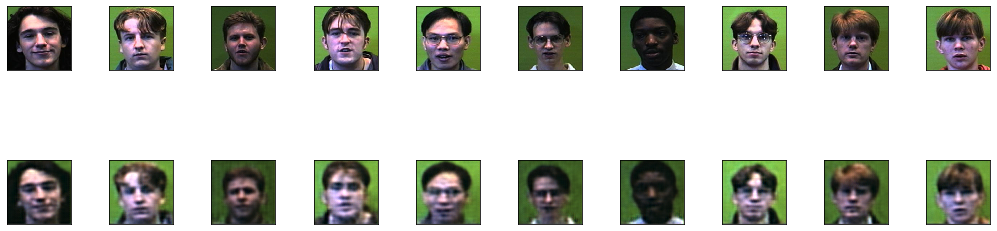

In [24]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X_train.shape[0], size=num_images)

encoded_imgs = encoder.predict(X_train)
decoded_imgs = model.predict(X_train)

# print (encoded_imgs[0].shape, encoded_imgs[0])

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(X[image_idx])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
        
#     plot encoded image
#     ax = plt.subplot(3, num_images, num_images + i + 1)
#     plt.imshow(encoded_imgs[image_idx])
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
#     print(f"encoded image - ", encoded_imgs[image_idx])
    
plt.show()

**Encoded Images**

In [28]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X_train.shape[0], size=num_images)

encoded_imgs = encoder.predict(X_train) 
decoded_imgs = model.predict(X_train)

print (encoded_imgs[0].shape, encoded_imgs[0])
import csv

with open('latent_vector_output.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(encoded_imgs)

# readFile.close()
writeFile.close()

for i, image_idx in enumerate(random_test_images):
    print(f"image - {i+1}\n");
    print(f"encoded image - {encoded_imgs[image_idx]}")


(4, 4, 100) [[[0.         0.         0.         ... 0.04008309 0.         0.        ]
  [0.         0.         0.         ... 0.         0.14239971 1.5643088 ]
  [0.         1.2959465  0.         ... 0.         0.40344232 0.48586246]
  [1.4221864  0.         0.         ... 0.         1.0063567  0.1705909 ]]

 [[0.         0.9903397  0.         ... 0.         0.2159551  0.        ]
  [0.         0.         0.         ... 0.         1.5538225  0.        ]
  [0.         0.6018143  0.54571944 ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         2.6174223  0.        ]]

 [[0.         2.2982595  0.         ... 0.         1.2027726  0.        ]
  [3.2727027  0.8811569  0.06077539 ... 0.12095269 1.291116   0.        ]
  [1.0878371  1.620219   0.         ... 0.         0.         0.58376783]
  [0.601026   0.         0.         ... 0.         0.6423557  0.        ]]

 [[0.0263567  1.9173267  0.         ... 0.         0.6992893  0.82459474]
  [0.80651754 0.    

In [29]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 19.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [30]:
!ls

drive  latent_vector_output.csv  sample_data


In [31]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
gauth.LocalWebserverAuth()

drive = GoogleDrive(gauth)

InvalidConfigError: ignored

# ** -----------------------------------**